## Sentimental Analysis using RNN

### Importing necessary Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score,recall_score
import seaborn as sns
plt.style.use('ggplot')

### Reading the data

In [33]:
train=pd.read_csv(r"C:\Users\vaish\Downloads\DL + AI Exam Paper (1)\DL + AI Exam Paper\Dataset\RNN\tweets_train.csv")
test=pd.read_csv(r"C:\Users\vaish\Downloads\DL + AI Exam Paper (1)\DL + AI Exam Paper\Dataset\RNN\tweets_test.csv")

In [34]:
train.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative


### Text Preprocessing

In [38]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Check for NaN values in clean_text
train['clean_text'].isnull().sum()

# Replace NaN values with empty string
train['clean_text'].fillna('', inplace=True)

# Tokenizer initialization and fitting
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['clean_text'])

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train['clean_text'])

# Padding sequences
max_length = 256  # Adjust based on your maximum sequence length
X_train = pad_sequences(X_train, maxlen=max_length)



### Encode Labels

In [40]:
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train = train['Sentiment'].map(label_map)

### Splitting the data using train_test_split

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Defining the model Parameters

In [43]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
embedding_dim = 100
units = 64
epochs = 10
batch_size = 32

### Model Architecture

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.SimpleRNN(units=units),
    tf.keras.layers.Dense(3, activation='softmax')
])


C:\Users\vaish\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Compiling the model

In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [47]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val))

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 44s 96ms/step - accuracy: 0.6171 - loss: 0.8551 - val_accuracy: 0.8300 - val_loss: 0.4688
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 39s 91ms/step - accuracy: 0.9070 - loss: 0.2752 - val_accuracy: 0.8724 - val_loss: 0.3920
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.9675 - loss: 0.1103 - val_accuracy: 0.8776 - val_loss: 0.4047
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9884 - loss: 0.0407 - val_accuracy: 0.8829 - val_loss: 0.4403
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9954 - loss: 0.0196 - val_accuracy: 0.8853 - val_loss: 0.4790
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.9993 - loss: 0.0064 - val_accuracy: 0.8638 - val_loss: 0.5627
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9956 - loss: 0.0189 - val_accuracy: 0.6032 - val_loss: 1.1397
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.8302 - loss: 0.4237 

### Evaluating the model

In [48]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.4f}')


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8705 - loss: 0.4598
Validation Accuracy: 0.8779


### Applying preprocessing on test data and predicting the sentiments for test data

In [50]:
# Assuming test is your DataFrame containing the test data

# Check for NaN values in clean_text
test['clean_text'].isnull().sum()

# Replace NaN values with empty string
test['clean_text'].fillna('', inplace=True)

# Tokenize and pad sequences for test data
X_test = tokenizer.texts_to_sequences(test['clean_text'])
X_test = pad_sequences(X_test, maxlen=max_length)

# Now X_test is ready for prediction
predictions = model.predict(X_test)


96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


In [62]:
test['predictions'] = np.argmax(predictions, axis=1)  

inverse_label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
test['predictions'] = np.argmax(predictions, axis=1)
test['Predicted_results'] = test['predictions'].map(inverse_label_map)

# Save updated test data with predictions
test.to_csv('Test_data_with_predictions.csv', index=False)

#### Saving all the predictions on test data into a csv file

In [65]:
Test_data_with_preditions=pd.read_csv(r"C:\Users\vaish\Downloads\Test_data_with_predictions.csv")

In [66]:
Test_data_with_preditions

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,predictions,Predicted_results
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",12-12-2015 15:22,157,228,496,False,15-09-2020 22:53,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,Watch theSocialDilemma then joinMastodon,1,Neutral
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,10-09-2011 12:17,1722,2500,13912,False,12-09-2020 04:43,['WeTheNorth'],Twitter Web App,False,With the 2019 2020 NBA season officially over ...,1,Neutral
2,🌤,NaN,NaN,01-06-2011 02:23,880,585,205,False,19-09-2020 07:06,['TheSocialDilemma'],Twitter for iPhone,False,if you want to really know about people go tal...,2,Positive
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,17-04-2009 13:35,1143,2692,11999,False,12-09-2020 18:28,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,Have you watched TheSocialDilemma on Netflix,1,Neutral
4,Mahima Sood,NaN,Amy Dunne X Holly Golightly || Data Scientist ...,26-01-2018 21:57,18,65,263,False,12-09-2020 18:48,['TheSocialDilemma'],Twitter for iPhone,False,Highly recommend TheSocialDilemma on,2,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,𝘔𝘶𝘳𝘪;🦋,𝘶𝘯𝘥𝘦𝘳 𝘵𝘩𝘦 𝘱𝘢𝘭𝘮𝘴🌴,𝘸𝘪𝘧𝘦 // 𝘤𝘢𝘵 𝘮𝘰𝘮 // 𝘱𝘴𝘺𝘤𝘩𝘰𝘭𝘰𝘨𝘪𝘴𝘵; 🧠 𝘣𝘦𝘢𝘤𝘩𝘣𝘶𝘮;🌴,29-07-2009 03:18,942,357,9917,False,14-09-2020 12:27,['TheSocialDilemma'],Twitter for iPhone,False,Everybody should watch TheSocialDilemma,1,Neutral
3064,Didi Crawford,"Birmingham, England",Traveller | Blogger | Currently growing a huma...,06-12-2011 09:24,468,1095,3440,False,22-09-2020 19:25,['TheSocialDilemma'],Twitter for iPhone,False,Enjoyed TheSocialDilemma Then read this,2,Positive
3065,Ritwik Arora,NaN,"Spent the last 30 minutes writing this bio, ch...",13-10-2020 01:12,10,137,106,False,13-10-2020 02:41,['TheSocialDilemma'],Twitter for Android,False,Couldn t stop thinking about docu TheSocialDil...,1,Neutral
3066,Nishant Mody,Mumbai,"I love music, dogs, nature, politics & marketi...",30-12-2012 04:58,174,541,5482,False,10-09-2020 17:19,['TheSocialDilemma'],Twitter for iPhone,False,This was the best one by on TheSocialDilemma on,2,Positive


### Visualizing Accuracy and loss

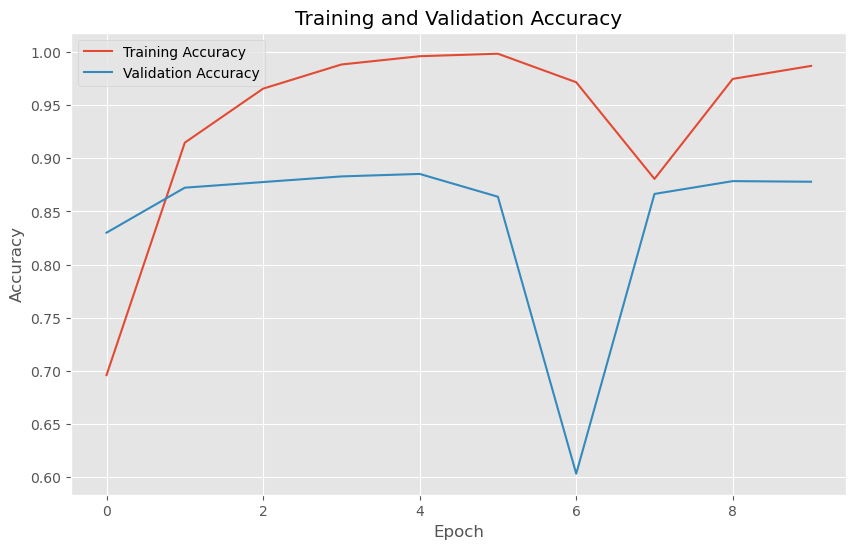

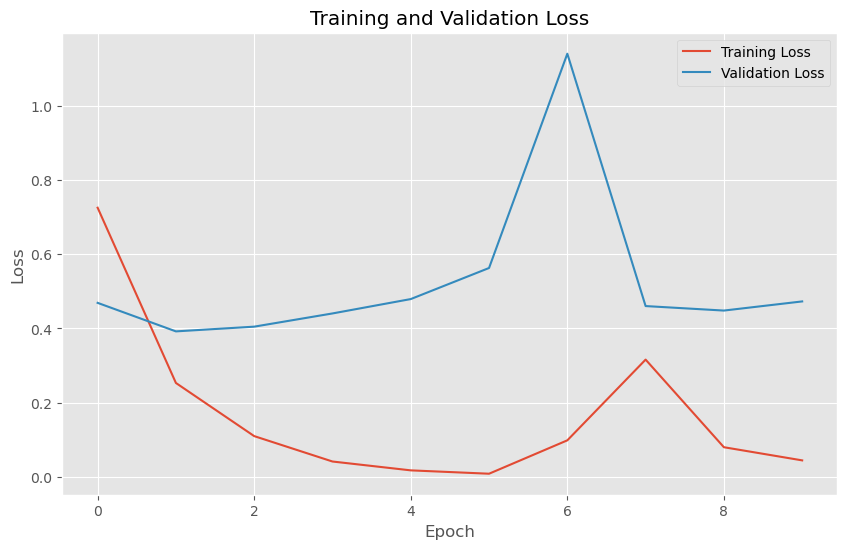

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training history: loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()